# Задание 2


## Импортируем нужные библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

## Загрузка датасета (old)


In [2]:
boston = load_boston()
print(boston.DESCR)

In [3]:
data = pd.DataFrame(data=boston.data, columns=boston.feature_names)
data['Price'] = boston.target

In [4]:
data.head()

## Загрузка датасета


In [ ]:
data = pd.read_csv('boston.csv', index_col='Unnamed: 0')

In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
data.shape

(506, 14)

## Визуализация

In [ ]:
bins = int(2 * np.cbrt(data.shape[0]))  # int(np.around(1 + np.log2(data.shape[0])))
bins

15

###  Количество домов определенной стоимости

Text(0.5, 1.0, 'Количество домов определенной стоимости')

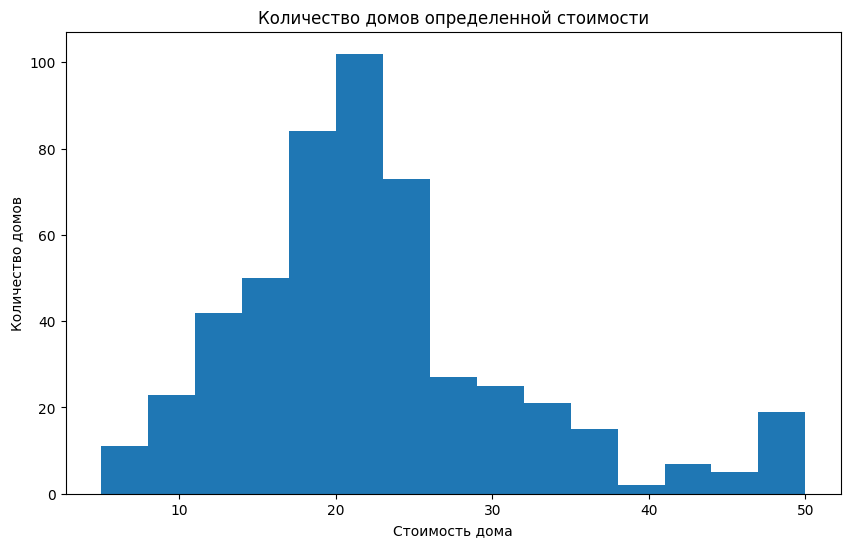

In [ ]:
plt.figure(figsize = (10,6))
plt.hist(data['Price'], bins=bins)
plt.xlabel('Стоимость дома')
plt.ylabel('Количество домов')
plt.title("Количество домов определенной стоимости")

###  Количество домов с определенным количеством комнат

Text(0.5, 1.0, 'Количество домов с определенным количеством комнат')

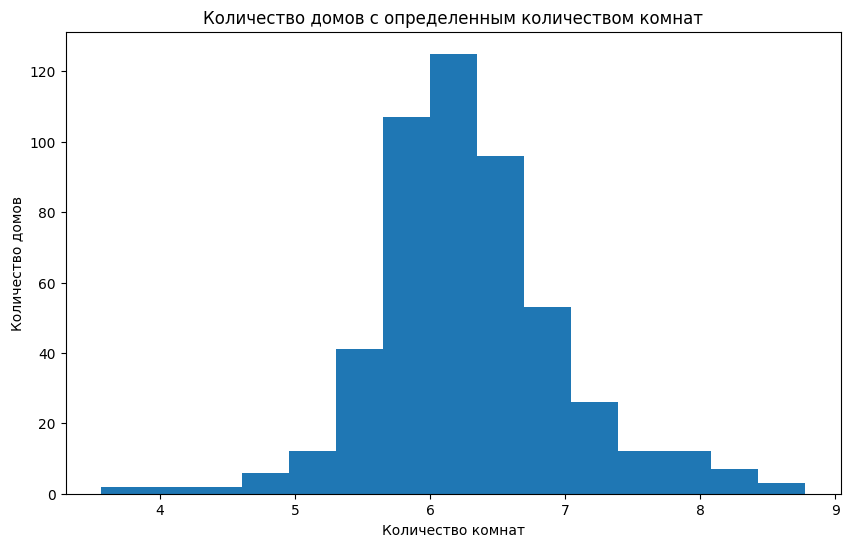

In [ ]:
plt.figure(figsize = (10,6))
plt.hist(data['RM'], bins=bins)
plt.xlabel('Количество комнат')
plt.ylabel('Количество домов')
plt.title("Количество домов с определенным количеством комнат")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 59.3 KB


In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Корреляции

In [ ]:
def PrintCorr(dataset):
    plt.figure(figsize=(12,9))
    corr = dataset.corr()
    sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',
                mask=np.zeros_like(corr, dtype=bool),
                cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

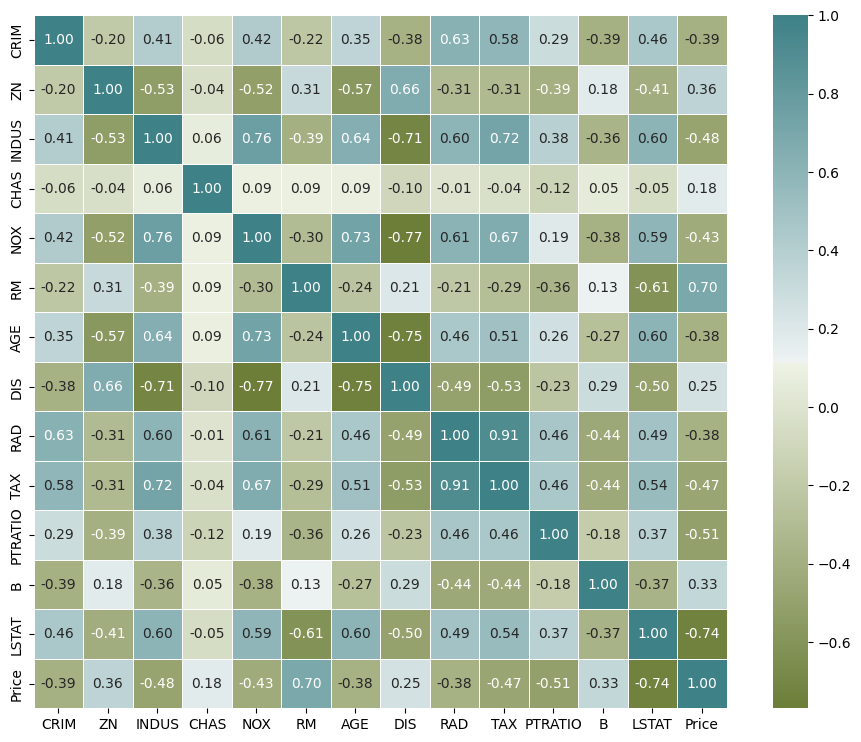

In [ ]:
PrintCorr(data)

## Обучение модели

In [ ]:
X = data.drop(columns=['Price'])
y = data['Price']

In [ ]:
def LinReg(X, y):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(Xtrain, ytrain) # обучение модели
    pred_train = model.predict(Xtrain)
    pred_test = model.predict(Xtest)
    print("Train -",mean_squared_error(pred_train, ytrain) ** 0.5, "Test -",mean_squared_error(pred_test, ytest) ** 0.5)
    print("Model train score -", model.score(Xtrain, ytrain), "Model test score -", model.score(Xtest, ytest))
    print(pd.DataFrame(data=model.coef_, index=Xtrain.columns, columns=['coef']))
    return model, Xtrain, ytrain

In [ ]:
LinReg(X, y)

Train - 4.6520331848801675 Test - 4.928602182665332
Model train score - 0.7508856358979673 Model test score - 0.6687594935356326
              coef
CRIM     -0.113056
ZN        0.030110
INDUS     0.040381
CHAS      2.784438
NOX     -17.202633
RM        4.438835
AGE      -0.006296
DIS      -1.447865
RAD       0.262430
TAX      -0.010647
PTRATIO  -0.915456
B         0.012351
LSTAT    -0.508571


(LinearRegression(),
          CRIM    ZN  INDUS  CHAS     NOX     RM   AGE     DIS   RAD    TAX  \
 477  15.02340   0.0  18.10   0.0  0.6140  5.304  97.3  2.1007  24.0  666.0   
 15    0.62739   0.0   8.14   0.0  0.5380  5.834  56.5  4.4986   4.0  307.0   
 332   0.03466  35.0   6.06   0.0  0.4379  6.031  23.3  6.6407   1.0  304.0   
 423   7.05042   0.0  18.10   0.0  0.6140  6.103  85.1  2.0218  24.0  666.0   
 19    0.72580   0.0   8.14   0.0  0.5380  5.727  69.5  3.7965   4.0  307.0   
 ..        ...   ...    ...   ...     ...    ...   ...     ...   ...    ...   
 106   0.17120   0.0   8.56   0.0  0.5200  5.836  91.9  2.2110   5.0  384.0   
 270   0.29916  20.0   6.96   0.0  0.4640  5.856  42.1  4.4290   3.0  223.0   
 348   0.01501  80.0   2.01   0.0  0.4350  6.635  29.7  8.3440   4.0  280.0   
 435  11.16040   0.0  18.10   0.0  0.7400  6.629  94.6  2.1247  24.0  666.0   
 102   0.22876   0.0   8.56   0.0  0.5200  6.405  85.4  2.7147   5.0  384.0   
 
      PTRATIO       B  LSTAT 

## Логарифмирование

In [ ]:
data['Price'].skew()

1.1080984082549072

In [ ]:
data['Price'].min()

5.0

In [ ]:
y_log = np.log(data['Price'])
y_log.skew()

-0.33032129530987864

Text(0.5, 1.0, 'Количество домов определенной стоимости (Логарифм)')

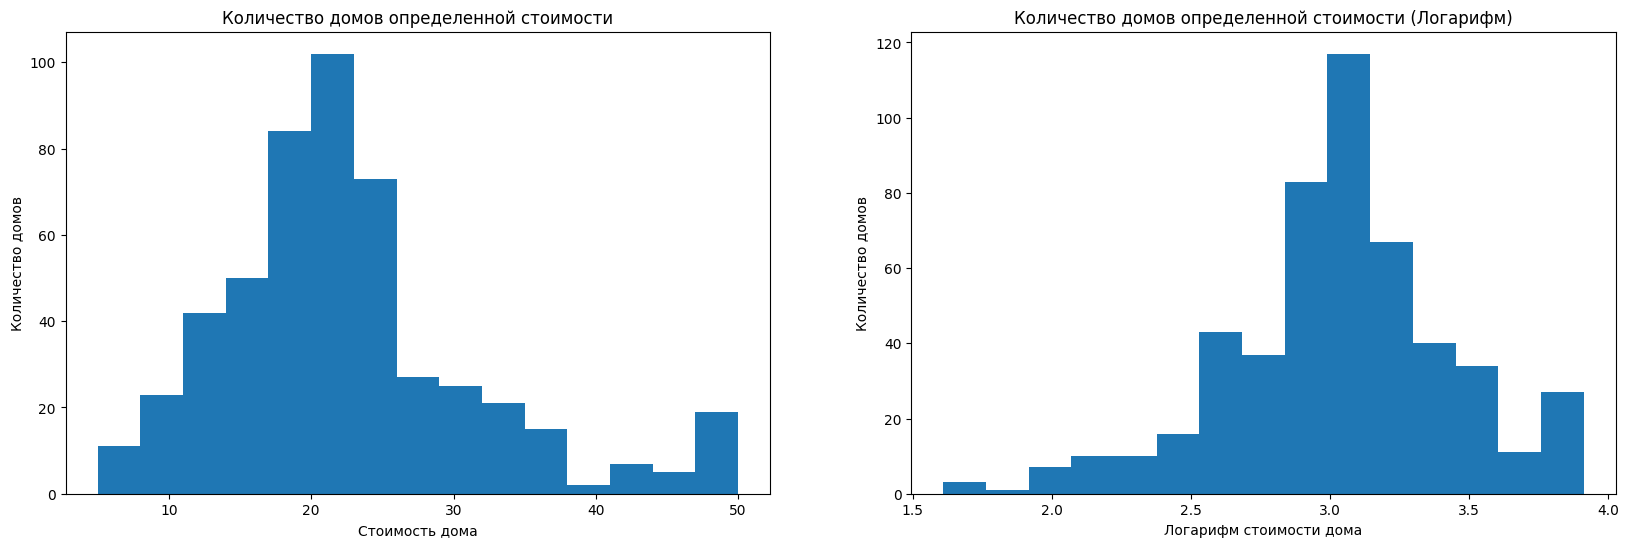

In [ ]:
plt.figure(figsize = (20,6))

plt.subplot (1, 2, 1)
plt.hist(data['Price'], bins=bins)
plt.xlabel('Стоимость дома')
plt.ylabel('Количество домов')
plt.title("Количество домов определенной стоимости")

plt.subplot (1, 2, 2)
plt.hist(y_log, bins=bins)
plt.xlabel('Логарифм стоимости дома')
plt.ylabel('Количество домов')
plt.title("Количество домов определенной стоимости (Логарифм)")

In [ ]:
model1_log, x_train, y_train = LinReg(X, y_log)

Train - 0.1857714206727534 Test - 0.19887688645320223
Model train score - 0.795714923175866 Model test score - 0.7462724975382753
             coef
CRIM    -0.009679
ZN       0.000757
INDUS    0.003057
CHAS     0.096207
NOX     -0.727261
RM       0.113095
AGE     -0.000139
DIS     -0.048944
RAD      0.011139
TAX     -0.000505
PTRATIO -0.036989
B        0.000579
LSTAT   -0.028321


## Работа с фичами

# Новый раздел

### p-value

In [ ]:
X_incl_const = sm.add_constant(x_train)
model_sm = sm.OLS(y_train, X_incl_const)
results = model_sm.fit()
org_coef = pd.DataFrame({'coef': round(results.params, 4), 'p-value': round(results.pvalues, 4)})

In [ ]:
org_coef

,coef,p-value
const,3.8409,0.0000
CRIM,-0.0097,0.0000
ZN,0.0008,0.2370
INDUS,0.0031,0.2565
CHAS,0.0962,0.0121
NOX,-0.7273,0.0000
RM,0.1131,0.0000
AGE,-0.0001,0.8116
DIS,-0.0489,0.0000
RAD,0.0111,0.0003


 ### vif (Мультиколлинеарность)

In [ ]:
vif = [variance_inflation_factor(exog=X_incl_const.values, exog_idx=i) for i in range (X_incl_const.shape[1])]

In [ ]:
pd.DataFrame({'corf_name': X_incl_const.columns, 'vif':np.around(vif, 2)})

,corf_name,vif
0,const,580.75
1,CRIM,1.71
2,ZN,2.47
3,INDUS,3.88
4,CHAS,1.10
5,NOX,4.47
6,RM,1.95
7,AGE,2.99
8,DIS,4.17
9,RAD,7.66


## BIC

In [ ]:
print('BIC - ', results.bic)
print('R2 - ', results.rsquared)
print('R2 (adjusted)  - ', results.rsquared_adj)

BIC -  -129.53438883693286
R2 -  0.795714923175866
R2 (adjusted)  -  0.7889054206150615


In [ ]:
def StatLinReg(X_train, y_train, drop_columns = []):
    X_incl_const = sm.add_constant(X_train)
    X_incl_const = X_incl_const.drop(drop_columns, axis=1)

    model_sm = sm.OLS(y_train, X_incl_const)
    results = model_sm.fit()
    org_coef = pd.DataFrame({'coef': round(results.params, 4), 'p-value': round(results.pvalues, 4)})
    print('BIC - ', results.bic)
    print('R2 - ', results.rsquared)
    print('R2 (adjusted)  - ', results.rsquared_adj)
    return org_coef


In [ ]:
StatLinReg(x_train, y_train, ['INDUS'])

BIC -  -134.2002302322233
R2 -  0.7950384647288365
R2 (adjusted)  -  0.7887480851297215


,coef,p-value
const,3.8360,0.0000
CRIM,-0.0097,0.0000
ZN,0.0007,0.2924
CHAS,0.1007,0.0084
NOX,-0.6752,0.0000
RM,0.1103,0.0000
AGE,-0.0001,0.8371
DIS,-0.0507,0.0000
RAD,0.0103,0.0005
TAX,-0.0004,0.0062


In [ ]:
red_coef = StatLinReg(x_train, y_train, ['INDUS', 'AGE'])

BIC -  -140.15789143465688
R2 -  0.7950162659512617
R2 (adjusted)  -  0.7892641713733635


In [ ]:
StatLinReg(x_train, y_train, ['INDUS', 'AGE', 'ZN'])

BIC -  -144.95736073647925
R2 -  0.7944055081315884
R2 (adjusted)  -  0.7891740961247586


,coef,p-value
const,3.8528,0.0000
CRIM,-0.0096,0.0000
CHAS,0.1014,0.0078
NOX,-0.7069,0.0000
RM,0.1118,0.0000
DIS,-0.0454,0.0000
RAD,0.0100,0.0007
TAX,-0.0004,0.0106
PTRATIO,-0.0388,0.0000
B,0.0006,0.0000


In [ ]:
StatLinReg(x_train, y_train, ['INDUS', 'AGE', 'ZN'])

BIC -  -144.95736073647925
R2 -  0.7944055081315884
R2 (adjusted)  -  0.7891740961247586


,coef,p-value
const,3.8528,0.0000
CRIM,-0.0096,0.0000
CHAS,0.1014,0.0078
NOX,-0.7069,0.0000
RM,0.1118,0.0000
DIS,-0.0454,0.0000
RAD,0.0100,0.0007
TAX,-0.0004,0.0106
PTRATIO,-0.0388,0.0000
B,0.0006,0.0000


## Ошибки


Text(0, 0.5, 'Residuals')

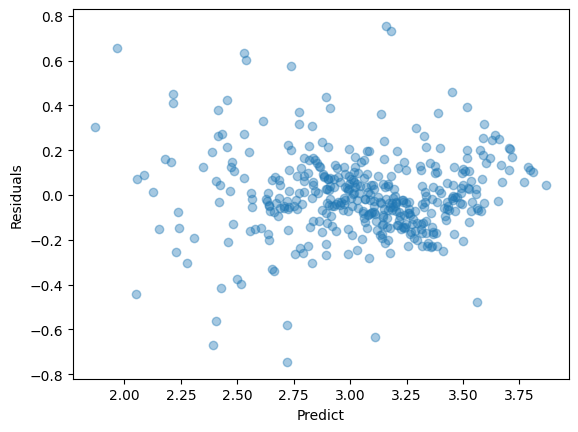

In [ ]:
plt. scatter(x=results.fittedvalues, y=results.resid, alpha=0.4)
plt.xlabel('Predict')
plt.ylabel('Residuals')

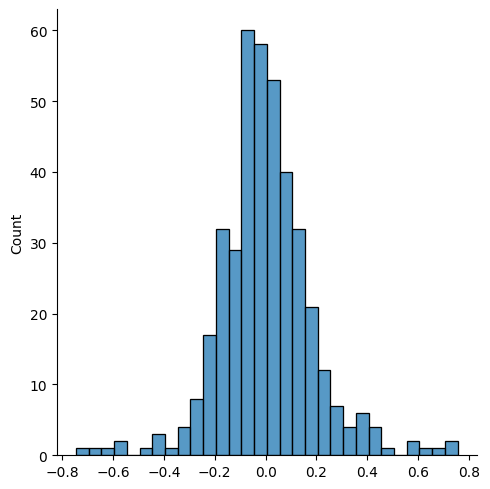

In [ ]:
sns.displot(results.resid)

## Создавать новые из уже существующих

In [1]:
# возводим в квадрат существующий признак для его искуственного усиления
data['NEW'] = data['LSTAT'] ** 2

NameError: name 'data' is not defined

In [ ]:
X = data.drop(columns=['Price'])

In [ ]:
model2, x_train, y_train = LinReg(X, y_log)

Train - 0.18052097021702632 Test - 0.1851549353364105
Model train score - 0.8070991436854392 Model test score - 0.780077580070778
             coef
CRIM    -0.010084
ZN       0.000410
INDUS    0.003277
CHAS     0.089259
NOX     -0.697880
RM       0.090342
AGE      0.000409
DIS     -0.044580
RAD      0.010977
TAX     -0.000483
PTRATIO -0.034218
B        0.000518
LSTAT   -0.055795
NEW      0.000763


In [ ]:
reg_coef_2 = StatLinReg(x_train, y_train, ['INDUS', 'AGE'])

BIC -  -156.51156954699087
R2 -  0.8060508053930016
R2 (adjusted)  -  0.8000984004434262


In [ ]:
reg_coef_3 = StatLinReg(x_train, y_train, ['INDUS', 'AGE', 'ZN'])

BIC -  -162.2941833177658
R2 -  0.8059457366007631
R2 (adjusted)  -  0.8005003363523151


In [ ]:
frames = [org_coef, red_coef, reg_coef_2, reg_coef_3]
pd.concat(frames, axis=1)

,coef,p-value,coef,p-value,coef,p-value,coef,p-value
const,3.8409,0.0000,3.8389,0.0000,4.0433,0.0000,4.0517,0.0000
CRIM,-0.0097,0.0000,-0.0097,0.0000,-0.0101,0.0000,-0.0100,0.0000
ZN,0.0008,0.2370,0.0007,0.2805,0.0003,0.6456,NaN,NaN
INDUS,0.0031,0.2565,NaN,NaN,NaN,NaN,NaN,NaN
CHAS,0.0962,0.0121,0.1004,0.0084,0.0951,0.0104,0.0955,0.0100
NOX,-0.7273,0.0000,-0.6837,0.0000,-0.6138,0.0001,-0.6224,0.0001
RM,0.1131,0.0000,0.1095,0.0000,0.0908,0.0000,0.0915,0.0000
AGE,-0.0001,0.8116,NaN,NaN,NaN,NaN,NaN,NaN
DIS,-0.0489,0.0000,-0.0501,0.0000,-0.0487,0.0000,-0.0467,0.0000
RAD,0.0111,0.0003,0.0104,0.0005,0.0099,0.0006,0.0098,0.0006
